In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
!ls
%cd gdrive/MyDrive/SB
!ls

gdrive	sample_data
/content/gdrive/MyDrive/SB
converted  converted2  data  weightsv2.best.hdf5  yolov5


In [8]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

In [9]:
classifier = Sequential() #initialize cnn

In [10]:
classifier.add(Conv2D(filters=32,kernel_size=3, strides=(1,1), input_shape=(64,64,3), padding='same', activation = 'relu')) #number of feature detectors, row, column

In [11]:
classifier.add(MaxPooling2D(pool_size = (3,3)))

In [12]:
classifier.add(Conv2D(filters=64,kernel_size=3, strides=1, padding = 'same', activation = 'relu')) #number of feature detectors, row, column

In [13]:
classifier.add(MaxPooling2D(pool_size = (3,3)))

In [14]:
classifier.add(Conv2D(filters=64,kernel_size=3, strides=1, padding ='same', activation = 'relu')) #number of feature detectors, row, column

In [15]:
classifier.add(MaxPooling2D(pool_size = (3,3)))

In [16]:
classifier.add(Flatten())

In [17]:
classifier.add(Dense(512, activation='tanh'))

In [18]:
classifier.add(Dense(100 , activation = 'softmax'))

In [19]:
classifier.compile( optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
batch_size = 8

In [22]:
training_set = train_datagen.flow_from_directory('./converted2/train',
                                                 target_size = (64, 64),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('./converted2/test',
                                            target_size = (64, 64),
                                            batch_size = batch_size//2,
                                            class_mode = 'categorical')

Found 750 images belonging to 100 classes.
Found 251 images belonging to 100 classes.


In [23]:
filepath = "weightsv2.best.hdf5"

In [24]:
call_back = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')
checkpoints = [call_back]

In [41]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 18,
                         epochs = 50,
                         validation_data = test_set,
                         callbacks = checkpoints)

Epoch 1/50
 3/18 [====>.........................] - ETA: 0s - loss: 2.5776 - accuracy: 0.2917

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


18/18 [==============================] - 1s 82ms/step - loss: 3.1628 - accuracy: 0.2361 - val_loss: 4.4376 - val_accuracy: 0.0757
Epoch 2/50
18/18 [==============================] - 1s 81ms/step - loss: 3.2177 - accuracy: 0.1875 - val_loss: 4.4568 - val_accuracy: 0.0677
Epoch 3/50
18/18 [==============================] - 1s 84ms/step - loss: 3.0497 - accuracy: 0.2569 - val_loss: 4.5020 - val_accuracy: 0.0757
Epoch 4/50
18/18 [==============================] - 1s 82ms/step - loss: 3.1916 - accuracy: 0.2778 - val_loss: 4.4727 - val_accuracy: 0.0677
Epoch 5/50
18/18 [==============================] - 1s 85ms/step - loss: 3.1937 - accuracy: 0.2569 - val_loss: 4.3439 - val_accuracy: 0.0598
Epoch 6/50
18/18 [==============================] - 1s 82ms/step - loss: 2.9940 - accuracy: 0.2639 - val_loss: 4.4847 - val_accuracy: 0.0717
Epoch 7/50
18/18 [==============================] - 1s 82ms/step - loss: 3.0467 - accuracy: 0.2606 - val_loss: 4.5736 - val_accuracy: 0.0837
Epoch 8/50
18/18 [======

In [38]:
from keras.utils.vis_utils import plot_model

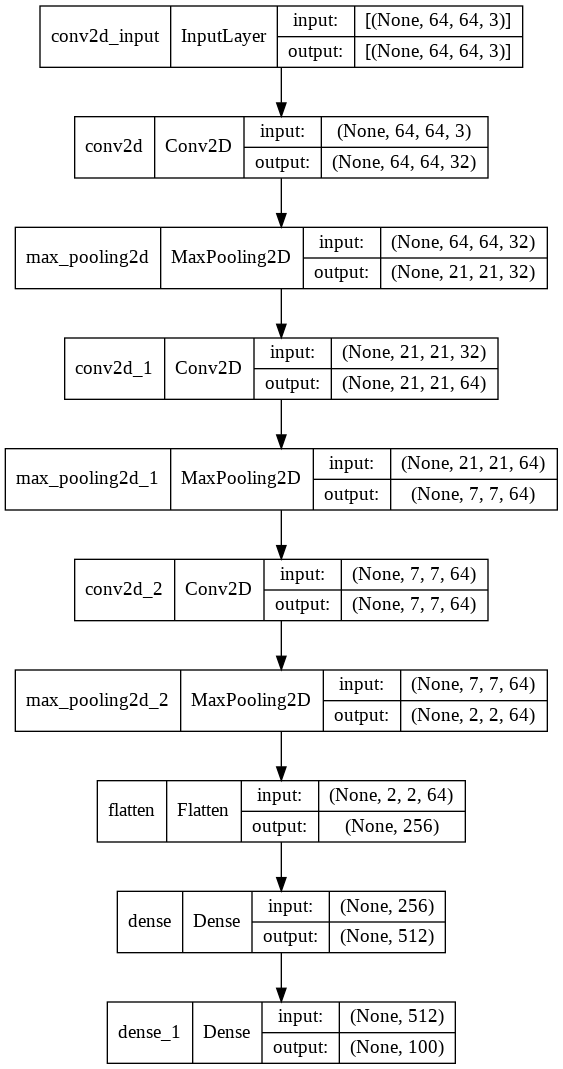

In [39]:
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [40]:
import matplotlib.pyplot as plt

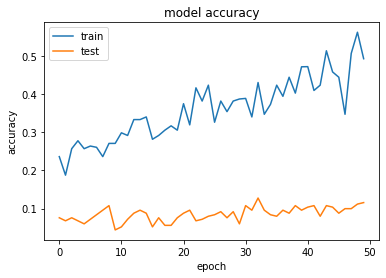

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

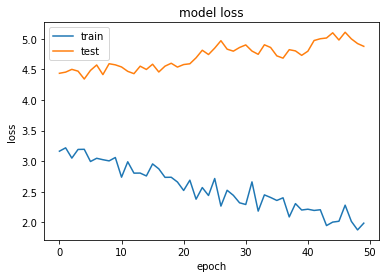

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()